In [30]:
%matplotlib inline

import library
import graphs

import numpy as np

In [31]:
# Access the document directory
text_dir = '/Users/hunterheidenreich/Documents/journals'
input_files = library.get_file_list(text_dir)

In [32]:
# Get the word lists
raw, stop, stem, lemma = library.preprocess_file_list(library.get_file_list(text_dir))

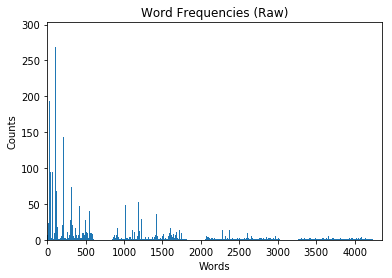

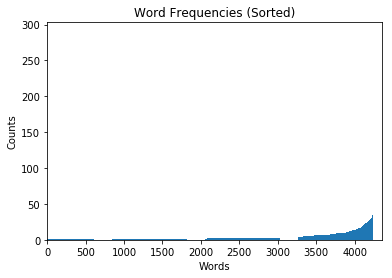

In [33]:
# Looking at word usage graphically 
counter = library.VocabUtils.aggregate_words_counts(lemma)
word_counts_raw = list(counter.values())
word_counts_sorted = sorted(word_counts_raw)

graphs.plot_bar_graph(range(len(word_counts_raw)), word_counts_raw, 
                      x_label='Words', y_label='Counts', title='Word Frequencies (Raw)',
                      export=True, export_name='visualizations/word_freq_bar_raw.png')
graphs.plot_bar_graph(range(len(word_counts_sorted)), word_counts_sorted, 
                      x_label='Words', y_label='Counts', title='Word Frequencies (Sorted)',
                      export=True, export_name='visualizations/word_freq_bar_sorted.png')

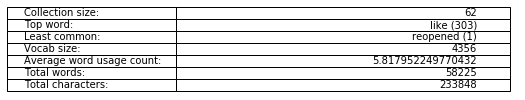

In [34]:
# Looking some basic statistics for vocab usage 
counter = library.VocabUtils.aggregate_words_counts(lemma)
data = [[len(input_files)],
        [library.VocabUtils.global_top_k_words(lemma, k=1)[0][0] + ' (' + str(library.VocabUtils.global_top_k_words(lemma, k=1)[0][1]) + ')'], 
        [library.VocabUtils.global_top_k_words(lemma, k=len(list(counter.keys())))[-1][0] + ' (' + str(library.VocabUtils.global_top_k_words(lemma, k=len(list(counter.keys())))[-1][1]) + ')'],
        [len(counter.items())],
        [np.mean(list(counter.values()))],
        [sum([len(word_list) for word_list in raw])],
        [sum([sum([len(w) for w in word_list]) for word_list in raw])]]
row_labels = ['Collection size: ', 'Top word: ', 'Least common: ', 'Vocab size: ', 'Average word usage count: ',
              'Total words: ', 'Total characters: ']

graphs.plot_table(cell_data=data, row_labels=row_labels,
                  export=True, export_name='visualizations/basic_stats_table.png')

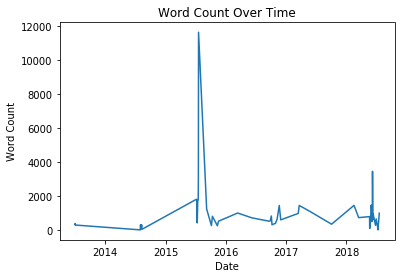

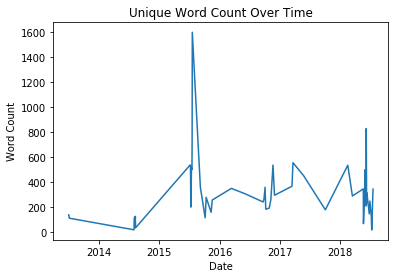

In [35]:
# Let's look at word count over time
raw_wc = [len(word_list) for word_list in raw]
labels = library.get_datetimes(input_files)
graphs.plot(labels, raw_wc, 
            x_label='Date', y_label='Word Count', title='Word Count Over Time',
            export=True, export_name='visualizations/word_count_by_time.png')

raw_wc_u = [len(list(library.VocabUtils.unique_vocab(word_list).items())) for word_list in raw]
graphs.plot(labels, raw_wc_u, 
            x_label='Date', y_label='Word Count', title='Unique Word Count Over Time',
            export=True, export_name='visualizations/unique_word_count_by_time.png')